# Data analysis on IMDB movies data

> documentation is done using markdown

In [3]:
# importing packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
# importing dataset 

df = pd.read_csv('./imdb_top_1000.csv.xls')

## This dataset has 1000 rows and 16 columns

### column discription

* Poster_Link
* Series_Title
* Released_Year
* Certificate
       * Runtime
       * Genre
       * IMDB_Rating
       * Overview
       * Meta_score
       * Director
       * Star1
       * Star2
       * Star3
       * Star4
       * No_of_Votes
       * Gross
      dtype='object'

In [5]:
df.shape
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

This dataset has 1000 rows and 16 coloumns 


Poster_Link
Series_Title
Released_Year
Certificate
Runtime
Genre
IMDB_Rating
Overview
Meta_score
Director
Star1
Star2
Star3
Star4
No_of_Votes
Gross
     

In [6]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


### we need to remove overview and poster link ( we analysed we dont need that)
### we dont have any usefull data in overview or postlink 

In [7]:
df.drop(["Poster_Link","Overview"], axis=1, inplace=True)  #step 2

Dropped the Unwanted coloumns Poster_Link","Overview"

In [8]:
df.isnull().sum() # step 3:we shall know about the null values

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [9]:
df.dtypes # we check the types of data so we can decide what we do with the null values

Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

#### As we see gross has both string (from 0 to 4) and float or numeric (NaN )
 ### so first we convert full data into a string

In [10]:
df['Gross'] = df['Gross'].astype(str)
df['Gross'] = df['Gross'].apply(lambda x: x.replace(',',''))
# as we see we converted string into a numeric or float data type

In [11]:
df['Gross'] = df['Gross'].astype(float) #now we change the datatype into a (particular datatype)float(we can do integer also)

###Gross is an object but we want it to be numeric 

In [12]:
df['Gross']

0       28341469.0
1      134966411.0
2      534858444.0
3       57300000.0
4        4360000.0
          ...     
995            NaN
996            NaN
997     30500000.0
998            NaN
999            NaN
Name: Gross, Length: 1000, dtype: float64

## Imputation 
#### 3 steps what we do is called as imputation

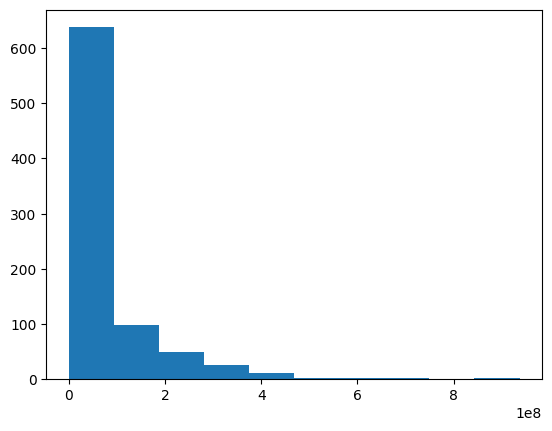

In [13]:
plt.hist(df['Gross'])
plt.show()

In [14]:
print (df['Gross'].mean())
print (df['Gross'].median())


68034750.87364621
23530892.0


In [15]:
df['Gross'].fillna(df['Gross'].median(),inplace=True) # here from previous median is average value or with near values so replace with median

In [16]:
df['Meta_score']

0       80.0
1      100.0
2       84.0
3       90.0
4       96.0
       ...  
995     76.0
996     84.0
997     85.0
998     78.0
999     93.0
Name: Meta_score, Length: 1000, dtype: float64

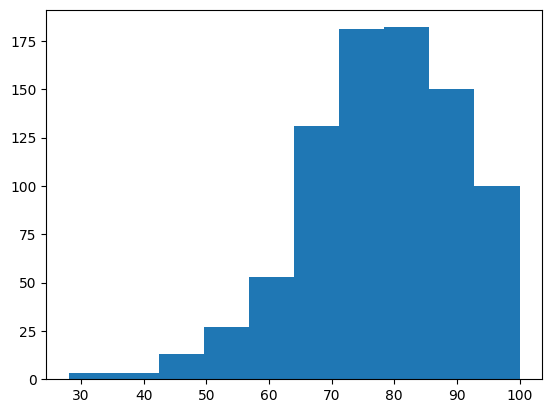

In [17]:
plt.hist(df['Meta_score']) # these 3 step from this , is called as imputation
plt.show()

In [18]:
print (df['Meta_score'].mean())
print (df['Meta_score'].median())

77.97153024911032
79.0


In [19]:
df['Meta_score'].fillna(df['Meta_score'].mean(),inplace=True)

### we have done filling the nulls of Gross as well as Meta_score with here respective mean or median values
#### we have done this because both the columns are numeric or with respect to money and finance so we can average some value and can fill the nulls 
### whereas the certificate cannot be doe like this so we drop all 101 rows of null in the certificate

In [20]:
df.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score         0
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross              0
dtype: int64

In [21]:
df.dropna(inplace=True)

In [22]:
df.isnull().sum()  # therefore there is no null values

Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [23]:
df['Runtime'] # data type is object ( we dont what 'min' to be mentioned)

0      142 min
1      175 min
2      152 min
3      202 min
4       96 min
        ...   
993    111 min
994     87 min
995    115 min
996    201 min
997    118 min
Name: Runtime, Length: 899, dtype: object

In [24]:
df['Runtime']=df['Runtime'].astype(str)

In [25]:
df['Runtime']= df['Runtime'].apply(lambda x: x.replace( 'min ',''))

In [26]:
df['Runtime']

0      142 min
1      175 min
2      152 min
3      202 min
4       96 min
        ...   
993    111 min
994     87 min
995    115 min
996    201 min
997    118 min
Name: Runtime, Length: 899, dtype: object

In [27]:
df.shape

(899, 14)

In [28]:
df.head

<bound method NDFrame.head of                  Series_Title Released_Year Certificate  Runtime  \
0    The Shawshank Redemption          1994           A  142 min   
1               The Godfather          1972           A  175 min   
2             The Dark Knight          2008          UA  152 min   
3      The Godfather: Part II          1974           A  202 min   
4                12 Angry Men          1957           U   96 min   
..                        ...           ...         ...      ...   
993                    Blowup          1966           A  111 min   
994        A Hard Day's Night          1964           U   87 min   
995    Breakfast at Tiffany's          1961           A  115 min   
996                     Giant          1956           G  201 min   
997     From Here to Eternity          1953      Passed  118 min   

                        Genre  IMDB_Rating  Meta_score  \
0                       Drama          9.3        80.0   
1                Crime, Drama        